# Learning Linear Regression from Tensorflow Cookbook

## Inverse Matrix Transformation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [2]:
sess = tf.Session()

In [3]:
# Create the data
x_vals = np.linspace(0, 10, 100)
y_vals = x_vals + np.random.normal(0, 1, 100)

In [5]:
# Create design matrix
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1, 100)))
A = np.column_stack((x_vals_column, ones_column))

In [6]:
# Format the y matrix
y = np.transpose(np.matrix(y_vals))

# Create tensors
A_tensor = tf.constant(A)
y_tensor = tf.constant(y)

In [7]:
# Matrix inverse solution
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
tA_A_inv = tf.matrix_inverse(tA_A)
product = tf.matmul(tA_A_inv, tf.transpose(A_tensor))
solution = tf.matmul(product, y_tensor)

In [8]:
solution_eval = sess.run(solution)

# Extract coefficients
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]

In [9]:
print('slope: ' + str(slope))
print('y_intercept: ' + str(y_intercept))

# Get best fit line
best_fit = []
for i in x_vals:
  best_fit.append(slope*i+y_intercept)

slope: 0.967840187074
y_intercept: 0.198868069186


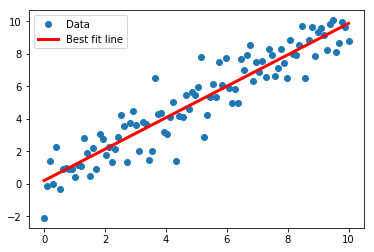

In [10]:
# Plot the results
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.show()